## Question 1: Data Exploration

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the data
iris_dataset = pd.read_csv('iris_dataset_missing.csv')

##### Using info, describe and head methods to have an overview of data

In [3]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   101 non-null    float64
 2   petal_length  97 non-null     float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


In [15]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [16]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor


### [CM1] Iris -Make a single pairplot for all the features in the IRIS dataset 

In [4]:
#import seaborn library
import seaborn as sns 

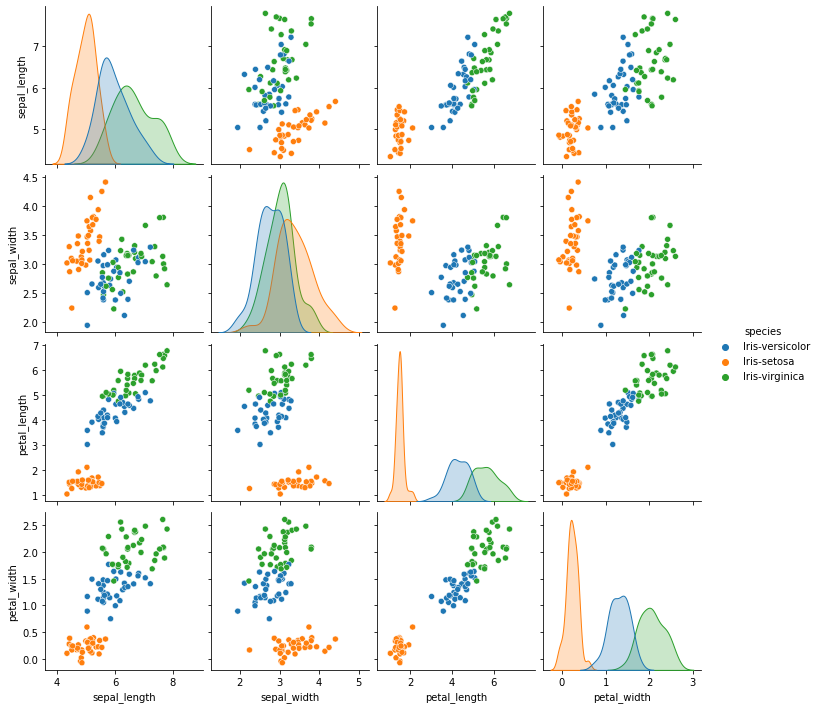

In [36]:
sns.pairplot(iris_dataset, hue = 'species')

Analysing the pairplot, we select the features where the scatter plot shows a recognizable linear pattern, as it indicates a strong correlation. Thus, we infer that there is a strong positive correlation between the following features:
1. petal_length and petal_width
2. petal_length and sepal_length

In the scatter plot of petal_length and petal_width, It is seen that all the three different types of species are very clearly seperated from each other.

Also, as the data points in the scatter plot of features sepal_width and sepal_length are completely spread out, thus there is no correlation between these two features

### [CM2] Iris: Calculate and report the correlation coefficient for the pair of features. To what extent are the features correlated? Do you find any interesting or significant relationships?

In [36]:
iris_dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.031792,0.880635,0.809915
sepal_width,-0.031792,1.000000,-0.285793,-0.267574
petal_length,0.880635,-0.285793,1.000000,0.958274
petal_width,0.809915,-0.267574,0.958274,1.000000


A correlation coefficient of +1 indicates perfect positive correlation, coeeficient of -1 indicates perfect negative coefficient of 0 indicates no correlation at all. 
Analysing the correlation matrix we can divide the features into the following groups:

    1. Strong Positive Correlation:
       petal_length and petal_width(0.958274)
       petal_length and sepal_length(0.880635)
       petal_width and sepal_length(0.809915)
       
    2. Weak negative correlation:
       petal_length and sepal_width(-0.285793)
       petal_width and sepal_width(-0.267574)
    
    3. No correlation
       sepal_length and sepal_width(-0.031792)

### [CM2] Iris: Calculate the mean, variance, skew, kurtosis for the datasets and explain your observation about the nature of data and the relationships between the features of the dataset.

In [37]:
iris_dataset.mean()

sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64

In [38]:
iris_dataset.var()

sepal_length    0.742420
sepal_width     0.207131
petal_length    3.216602
petal_width     0.619672
dtype: float64

In [46]:
iris_dataset.skew()

sepal_length    0.401506
sepal_width     0.367708
petal_length   -0.255767
petal_width    -0.074751
dtype: float64

In [39]:
iris_dataset.kurtosis()

sepal_length   -0.544820
sepal_width     0.510490
petal_length   -1.389810
petal_width    -1.315451
dtype: float64

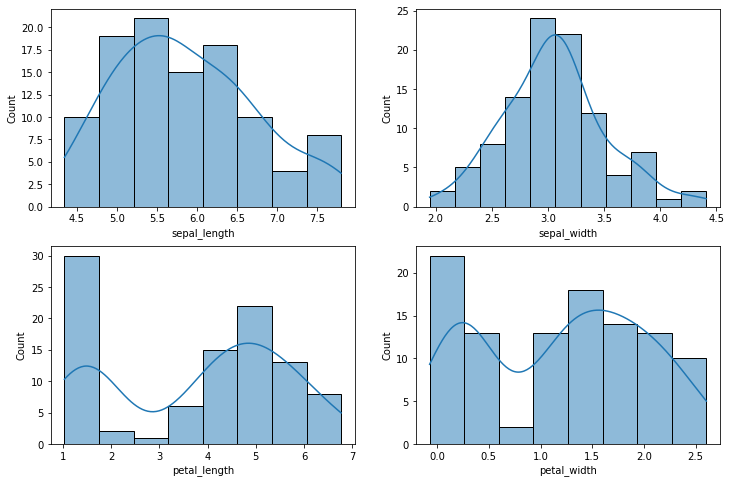

In [7]:
fig, axs = plt.subplots(2,2, figsize=(12, 8))
axs = axs.flatten()
index = 0
for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    sns.histplot(data = iris_dataset[feature], ax= axs[index], kde = True)
    index+=1

Observations:
1. As The skewness of all the features lies between +0.5 to -0.5 , we can infer that all of them have fairly symmetrical distributions.Thus we can say that mean gives an optimal estimate of the values in this case.
2. Among all the features, petal_length with the maximum variance is most widely spread among the samples of the dataset.
3. Analysing the kurtosis of the features, petal_length, petal_width and sepal_length demonstrate low degree of peakedness whreas sepal_width with a positive value of kurtosis has higher degree of peakedness than a normal curve.


### [CM3] Iris: Are there any notable outliers in the data that should be removed? Provide a short justification for your answer in plots and/or words.

<AxesSubplot:>

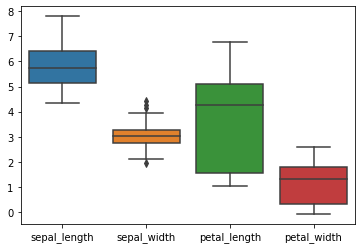

In [17]:
sns.boxplot(data = iris_dataset)

<AxesSubplot:>

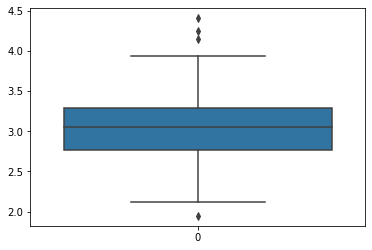

In [18]:
sns.boxplot(data = iris_dataset['sepal_width'])

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

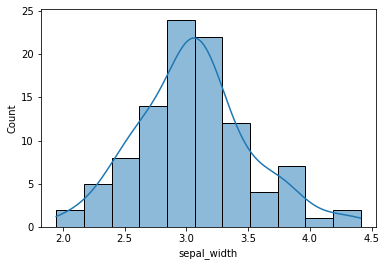

In [67]:
sns.histplot(iris_dataset['sepal_width'], kde =True)

To detect the outliers in the data, we plot a boxplot of the features in the dataset.
Boxplot indicates that there there are around 4-5 outliers with their sepal_width lying outside the 1.5 IQR(Inter-Quartile Range). Similar behaviour is confirmed by the histogram of sepal_width.

### [CM5] Iris: Data Cleaning: deal with any missing values in the data (use any of the methods discussed in class: dropping data, interpolating, replacing with approximations,. ). You can also remove any noise from the data by applying smoothing on some features. Report any changes you make and justify them. You can make comparisons if any of these approaches have an impact on classification performance using your validation set.

#### Analysing the data, we see that there are around 12 missing values in the dataset with 105 values

<AxesSubplot:>

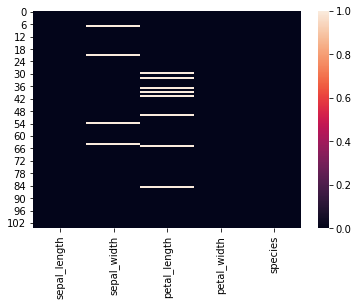

In [4]:
sns.heatmap(iris_dataset.isnull())

In [5]:
iris_dataset.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    8
petal_width     0
species         0
dtype: int64

#### Imputing the null values with mean of the distributions

It is evident that the data has very less skewness without any significant outliers, thus mean can be used to fill the missing values of the data

In [6]:
iris_dataset['sepal_width'] = iris_dataset['sepal_width'].fillna(iris_dataset['sepal_width'].mean())
iris_dataset['petal_length'] = iris_dataset['petal_length'].fillna(iris_dataset['petal_length'].mean())

Verifying the data after imputation:

In [7]:
iris_dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

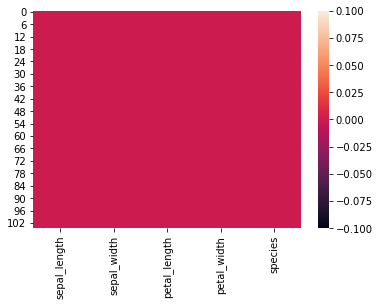

In [8]:
sns.heatmap(iris_dataset.isnull())

#### Dealing with outliers

As discussed in CM3, there are a few outliers present for sepal_width. As the number of these outliers is small, we remove them and then verify the data by constructing a box-plot of the filtered data

<AxesSubplot:>

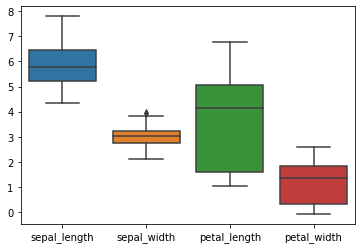

In [9]:
Q1 = iris_dataset['sepal_width'].quantile(0.25)
Q3 = iris_dataset['sepal_width'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (iris_dataset['sepal_width'] >= Q1 - 1.5 * IQR) & (iris_dataset['sepal_width'] <= Q3 + 1.5 *IQR)
new_data_set = iris_dataset.loc[filter]
sns.boxplot(data = new_data_set)

Now that we have cleaned our data from missing values and outliers, we can now apply classification algorithm on it.

## Question 2: KNN

#### 1. Divide the data into train, validation, and test sets (60%, 20%, 20%) Note: set the random seed for splitting, use random state=275 in the sci-kit learn train test split function to get the same split every time you run the program.

In [10]:
# Performing encoding of categorical values for model training and testing
new_data_set['species'] = new_data_set['species'].replace({'Iris-setosa': 0, 'Iris-versicolor' : 1, 'Iris-virginica': 2})
new_data_set.head()

<ipython-input-10-8d66be250faa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_set['species'] = new_data_set['species'].replace({'Iris-setosa': 0, 'Iris-versicolor' : 1, 'Iris-virginica': 2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,1
1,6.325517,2.115481,4.542052,1.413651,1
2,5.257497,3.814303,1.470660,0.395348,0
3,6.675168,3.201700,5.785461,2.362764,2
4,5.595237,2.678166,4.077750,1.369266,1


In [11]:
from sklearn.model_selection import train_test_split
X = new_data_set[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = new_data_set['species']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=275)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=275)

In [12]:
# Verifying the number of samples in train, test and validation sets
display(X_train.count())
display(X_val.count())
display(X_test.count())

sepal_length    60
sepal_width     60
petal_length    60
petal_width     60
dtype: int64

sepal_length    20
sepal_width     20
petal_length    20
petal_width     20
dtype: int64

sepal_length    21
sepal_width     21
petal_length    21
petal_width     21
dtype: int64

#### 2.Train the model with the classifier's default parameters. Use the train set and test the model on the test set. Store the accuracy of the model.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[5 1 0]
 [0 6 0]
 [0 2 7]]


In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.67      1.00      0.80         6
           2       1.00      0.78      0.88         9

    accuracy                           0.86        21
   macro avg       0.89      0.87      0.86        21
weighted avg       0.90      0.86      0.86        21



In [15]:
print(accuracy_score(y_test,predictions))

0.8571428571428571


#### It is observed that classifying the data with KNN (default configuration) gives us an accuracy of around 86% on the test set

#### 3. Find the best parameter for the classifier

### [CM6] Iris: When you finish trying all the possible parameter, plot a figure that shows the validation relationship between the accuracy and the parameter. Report the best k in terms of classification accuracy.

In [16]:
# Testing the following k-values for validation
k_values = [1,5,10,15,20,25,30,35]
# Storing the accuracies for different k-values in the following list
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_val)
    accuracies.append(accuracy_score(y_val,predictions))

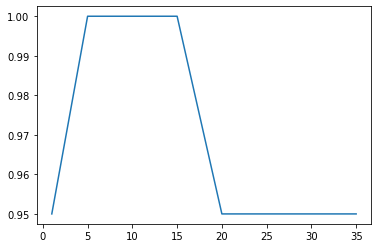

In [17]:
import matplotlib.pyplot as plt
plt.plot(k_values, accuracies)

From the above graph we observe that we are getting accuracy of 100% on the validation set with k values 5,10 and 15. However larger values of k value might lead to underfitting(high bias, low variance) and are computationally expensive. Thus we select k = 5 as the best parameter.

### [CM7] Iris: Now, using the best found parameters, fit the model using the training set and predict the target on the test set. Report the accuracy, AUC, f-score of your kNN classifier.

In [18]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
#Using k = 5 as it gave best accuracy on the validation set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_test,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_test, predictions, average='macro')))

y_prob = knn.predict_proba(X_test)
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
print('AUC :{AUC}'.format(AUC = macro_roc_auc_ovo))

Accuracy : 0.8571428571428571
F1 Score : 0.8613636363636363
AUC :0.9837962962962964


With our classification model, we get the following values of the metrics:
Accuracy: 86 % , 
AUC: 0.9837962962962964 ,
F1 Score: 0.86 (mean of per-class F1 score)



### Normalization: Normalize the data using methods we discussed and explain what you used and explain briefly what worked best. 

Trying out min-max normalisation and standardisation and comparing the results on Validation set

1. Trying min-max normalization on the data:

In [20]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

# Applying normalisation on training and validation set
X_train_minmax = mm_scaler.fit_transform(X_train)
X_val_minmax = mm_scaler.transform(X_val)

# Training the scaled data with KNN (Using k = 5 as it was selected as the best k value in the previous step)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax, y_train)
predictions = knn.predict(X_val_minmax)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_val,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_val, predictions, average='macro')))

Accuracy : 1.0
F1 Score : 1.0


2. Trying standardization on the data:

In [33]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()

# Applying standardization on training and validation set
X_train_std = standard_scaler.fit_transform(X_train)
X_val_std = standard_scaler.transform(X_val)

# Training the scaled data with KNN (Using k = 5 as it was selected as the best k value in the previous step)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
predictions = knn.predict(X_val_std)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_val,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_val, predictions, average='macro')))

Accuracy : 0.95
F1 Score : 0.9365079365079364


Normalization has improved the accuracy of our data, we will use Min-Max normalisation as it has a better accuracy

### Weighted KNN: The KNeighborsClassifier class has an option for weighted KNN where points that are nearby to the query point are more important for the classification than others. Try using different weighting schemes (default, manhatten, eculidean) to see the effect. You can also define your own distance metric to try to improve performance further (testing on validation only of course).

Using Default values (Eucledian or Minkowski Metric with p=2)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_minmax, y_train)
predictions = knn.predict(X_val_minmax)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_val,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_val, predictions, average='macro')))
y_prob = knn.predict_proba(X_val_minmax)
macro_roc_auc_ovo = roc_auc_score(y_val, y_prob, multi_class="ovo", average="macro")
print('AUC :{AUC}'.format(AUC = macro_roc_auc_ovo))

Accuracy : 1.0
F1 Score : 1.0
AUC :1.0


Using Minkowski metric with p =1 or Manhattan:

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan' , weights='distance')
knn.fit(X_train_minmax, y_train)
predictions = knn.predict(X_val_minmax)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_val,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_val, predictions, average='macro')))
y_prob = knn.predict_proba(X_val_minmax)
macro_roc_auc_ovo = roc_auc_score(y_val, y_prob, multi_class="ovo", average="macro")
print('AUC :{AUC}'.format(AUC = macro_roc_auc_ovo))

Accuracy : 1.0
F1 Score : 1.0
AUC :1.0


Checking performance on the validation set, we see that both of them give an accuracy of 100%. We will select Manhattan metric for KNN classification.

### [CM7] Iris: After making these improvements compute your new classification results on the test set and report the accuracy, AUC and f-score.

In [23]:
from sklearn.metrics import roc_auc_score

# Applying normalisation on training and test set
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan' , weights='distance')
knn.fit(X_train_minmax, y_train)
predictions = knn.predict(X_test_minmax)

print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_test,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_test, predictions, average='macro')))

y_prob = knn.predict_proba(X_test_minmax)
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
print('AUC :{AUC}'.format(AUC = macro_roc_auc_ovo))

Accuracy : 0.9047619047619048
F1 Score : 0.9107142857142857
AUC :1.0


After making all the improvements , we saw that our accuracy on test set increased from 85% to 90%.